# SciPy - Library of scientific algorithms for Python

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

## Introduction

The SciPy framework builds on top of the low-level NumPy framework for multidimensional arrays, and provides a large number of higher-level scientific algorithms. Some of the topics that SciPy covers are:

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
и др.

Each of these submodules provides a number of functions and classes that can be used to solve problems in their respective topics.

In this lecture we will look at how to use some of these subpackages.

To access the SciPy package in a Python program, we start by importing everything from the `scipy` module.

In [ ]:
from scipy import *

If we only need to use part of the SciPy framework we can selectively include only those modules we are interested in. For example, to include the linear algebra package under the name `la`, we can do:

In [ ]:
import scipy.linalg as la

## Special functions

A large number of mathematical special functions are important for many computional physics problems. SciPy provides implementations of a very extensive set of special functions. For details, see the list of functions in the reference documention at http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special. 

To demonstrate the typical usage of special functions we will look in more detail at the Bessel functions:

In [ ]:
#
# The scipy.special module includes a large number of Bessel-functions
# Here we will use the functions jn and yn, which are the Bessel functions 
# of the first and second kind and real-valued order. We also include the 
# function jn_zeros and yn_zeros that gives the zeroes of the functions jn
# and yn.
#
from scipy.special import jn, yn, jn_zeros, yn_zeros

In [ ]:
n = 0    # order
x = 0.0

# Bessel function of first kind
print "J_%d(%f) = %f" % (n, x, jn(n, x))

x = 1.0
# Bessel function of second kind
print "Y_%d(%f) = %f" % (n, x, yn(n, x))

J_0(0.000000) = 1.000000
Y_0(1.000000) = 0.088257


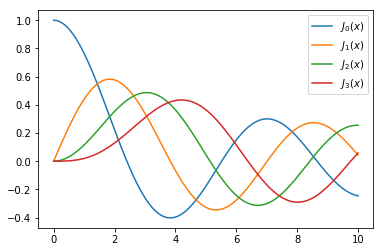

In [ ]:
x = linspace(0, 10, 100)

fig, ax = plt.subplots()
for n in range(4):
    ax.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
ax.legend();

### Numerical integration: quadrature

Numerical evaluation of a function of the type

$\displaystyle \int_a^b f(x) dx$

is called *numerical quadrature*, or simply *quadature*. SciPy provides a series of functions for different kind of quadrature, for example the `quad`, `dblquad` and `tplquad` for single, double and triple integrals, respectively.



In [ ]:
from scipy.integrate import quad, dblquad, tplquad

The `quad` function takes a large number of optional arguments, which can be used to fine-tune the behaviour of the function (try `help(quad)` for details).

The basic usage is as follows:

In [ ]:
help(quad)

Help on function quad in module scipy.integrate.quadpack:

quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)
    Compute a definite integral.
    
    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.
    
    Parameters
    ----------
    func : {function, scipy.LowLevelCallable}
        A Python function or method to integrate.  If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.
    
        If the user desires improved integration performance, then `f` may
        be a `scipy.LowLevelCallable` with one of the signatures::
    
            double func(double x)
            double func(double x, void *user_data)
            double func(int n, double *xx)
            double func(int n, double *xx, void *user_data)
    
        The ``user_data`` is the 

In [ ]:
# define a simple function for the integrand
def f(x):
    return x

In [ ]:
x_lower = 0 # the lower limit of x
x_upper = 1 # the upper limit of x

val, abserr = quad(f, x_lower, x_upper)

print "integral value =", val, ", absolute error =", abserr 

integral value = 0.5 , absolute error = 5.55111512313e-15


If we need to pass extra arguments to integrand function we can use the `args` keyword argument:

In [ ]:
def integrand(x, n):
    """
    Bessel function of first kind and order n. 
    """
    return jn(n, x)


x_lower = 0  # the lower limit of x
x_upper = 10 # the upper limit of x

val, abserr = quad(integrand, x_lower, x_upper, args=(3,))

print val, abserr 

0.736675137081 9.3891268825e-13



Higher-dimensional integration works in the same way:

In [ ]:
def integrand(x, y):
    return exp(-x**2-y**2)

x_lower = 0  
x_upper = 10
y_lower = 0
y_upper = 10

val, abserr = dblquad(integrand, x_lower, x_upper, lambda x : y_lower, lambda x: y_upper)

print val, abserr 

0.785398163397 1.63822994214e-13


## Linear algebra

The linear algebra module contains a lot of matrix related functions, including linear equation solving, eigenvalue solvers, matrix functions (for example matrix-exponentiation), a number of different decompositions (SVD, LU, cholesky), etc. 

Detailed documetation is available at: http://docs.scipy.org/doc/scipy/reference/linalg.html

Here we will look at how to use some of these functions:



### Linear equation systems

Linear equation systems on the matrix form

$A x = b$

where $A$ is a matrix and $x,b$ are vectors can be solved like:

In [ ]:
from scipy.linalg import *

In [ ]:
A = array([[1,2,3], [4,5,6], [7,8,9]])
b = array([1,2,3])

In [ ]:
x = solve(A, b)

x

array([-0.33333333,  0.66666667,  0.        ])

In [ ]:
# check
dot(A, x) - b

array([ -1.11022302e-16,   0.00000000e+00,   0.00000000e+00])

We can also do the same with

$A X = B$

where $A, B, X$ are matrices:

In [ ]:
A = rand(3,3)
B = rand(3,3)

In [ ]:
X = solve(A, B)

In [ ]:
X

array([[ 1.19168749,  1.34543171,  0.38437594],
       [-0.88153715, -3.22735597,  0.66370273],
       [ 0.10044006,  1.0465058 ,  0.39801748]])

In [ ]:
# check
norm(dot(A, X) - B)

2.0014830212433605e-16

### Matrix operations

In [ ]:
# the matrix inverse
inv(A)

array([[ 2.0031935 , -0.63411453,  0.49891784],
       [-4.63643938, -0.2212669 ,  3.35170585],
       [ 1.06421936,  1.37366073, -1.42726809]])

In [ ]:
# determinant
det(A)

-0.10292296739753022

In [ ]:
# norms of various orders
norm(A, ord=2), norm(A, ord=Inf)

(1.3060382297688262, 1.591998214728641)

### Sparse matrices

Sparse matrices are often useful in numerical simulations dealing with large systems, if the problem can be described in matrix form where the matrices or vectors mostly contains zeros. Scipy has a good support for sparse matrices, with basic linear algebra operations (such as equation solving, eigenvalue calculations, etc).

https://habr.com/ru/company/it-grad/blog/344320/

Это матрицы, которые в основном содержат нулевые элементы. Преимущество заключается в том, что нули в матричных операциях воспринимаются как пустые компоненты. Поэтому такие матрицы расходуют меньше памяти графического процессора. Это ускоряет процедуру машинного обучения, что важно для больших моделей.


For more information about these sparse formats, see e.g. http://en.wikipedia.org/wiki/Sparse_matrix

When we create a sparse matrix we have to choose which format it should be stored in. For example, 


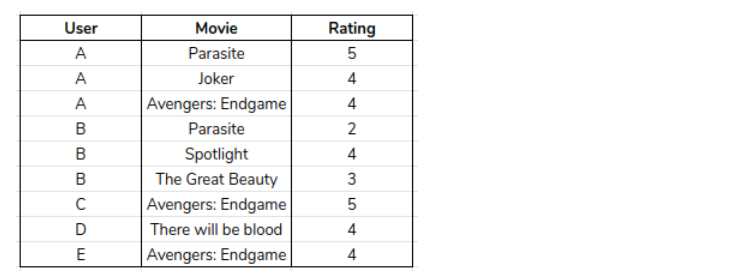

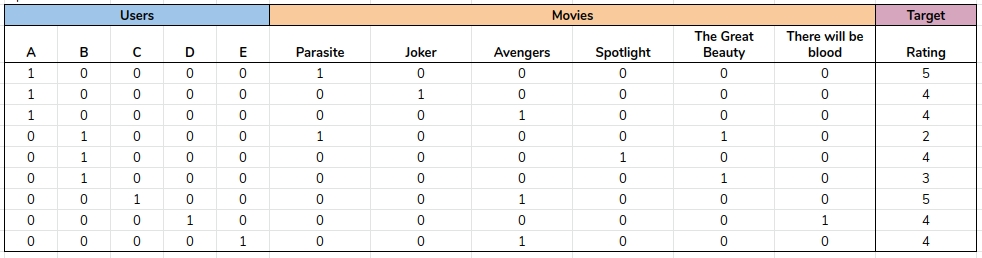

https://www.machinelearningmastery.ru/working-with-sparse-data-sets-in-pandas-and-sklearn-d26c1cfbe067/

In [ ]:
from scipy.sparse import *

In [ ]:
# dense matrix
M = array([[1,0,0,0], [0,3,0,0], [0,1,1,0], [1,0,0,1]]); M

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]])

In [ ]:
# convert from dense to sparse
A = csr_matrix(M); A
A


<4x4 sparse matrix of type '<type 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [ ]:
# convert from sparse to dense
A.todense()

matrix([[1, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]])

More efficient way to create sparse matrices: create an empty matrix and populate with using matrix indexing (avoids creating a potentially large dense matrix)

In [ ]:
A = lil_matrix((4,4)) # empty 4x4 sparse matrix
A[0,0] = 1
A[1,1] = 3
A[2,2] = A[2,1] = 1
A[3,3] = A[3,0] = 1
A

<4x4 sparse matrix of type '<type 'numpy.float64'>'
	with 6 stored elements in LInked List format>

In [ ]:
A.todense()

matrix([[1., 0., 0., 0.],
        [0., 3., 0., 0.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.]])

We can compute with sparse matrices like with dense matrices:

In [ ]:
A.todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  3.,  0.,  0.],
        [ 0.,  1.,  1.,  0.],
        [ 1.,  0.,  0.,  1.]])

In [ ]:
(A * A).todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  9.,  0.,  0.],
        [ 0.,  4.,  1.,  0.],
        [ 2.,  0.,  0.,  1.]])

In [ ]:
A.todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  3.,  0.,  0.],
        [ 0.,  1.,  1.,  0.],
        [ 1.,  0.,  0.,  1.]])

In [ ]:
A.dot(A).todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  9.,  0.,  0.],
        [ 0.,  4.,  1.,  0.],
        [ 2.,  0.,  0.,  1.]])

In [ ]:
v = array([1,2,3,4])[:,newaxis]; v

array([[1],
       [2],
       [3],
       [4]])

In [ ]:
# sparse matrix - dense vector multiplication
A * v

array([[ 1.],
       [ 6.],
       [ 5.],
       [ 5.]])

In [ ]:
# same result with dense matrix - dense vector multiplcation
A.todense() * v

matrix([[ 1.],
        [ 6.],
        [ 5.],
        [ 5.]])

## Optimization

Optimization (finding minima or maxima of a function) is a large field in mathematics, and optimization of complicated functions or in many variables can be rather involved. Here we will only look at a few very simple cases. For a more detailed introduction to optimization with SciPy see: http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html

To use the optimization module in scipy first include the `optimize` module:

In [ ]:
from scipy import optimize

### Finding a minima

Let's first look at how to find the minima of a simple function of a single variable:

In [ ]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

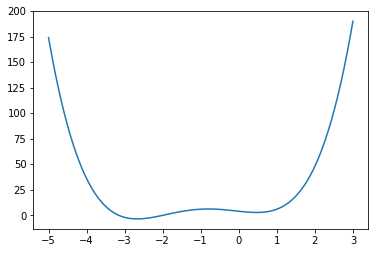

In [ ]:
fig, ax  = plt.subplots()
x = linspace(-5, 3, 100)
ax.plot(x, f(x));

We can use the `fmin_bfgs` function to find the minima of a function:

In [ ]:
x_min = optimize.fmin_bfgs(f, -2)
x_min 

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 8


array([-2.67298151])

We can also use the `brent` or `fminbound` functions. They have a bit different syntax and use different algorithms. 

In [ ]:
optimize.fminbound(f, -4, 2)

-2.6729822917513886

## Interpolation

Interpolation is simple and convenient in scipy: The `interp1d` function, when given arrays describing X and Y data, returns and object that behaves like a function that can be called for an arbitrary value of x (in the range covered by X), and it returns the corresponding interpolated y value:

In [ ]:
from scipy.interpolate import *

In [ ]:
def f(x):
    return sin(x)

In [ ]:
n = arange(0, 10)  
x = linspace(0, 9, 100)

y_meas = f(n) + 0.1 * randn(len(n)) # simulate measurement with noise
y_real = f(x)

linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

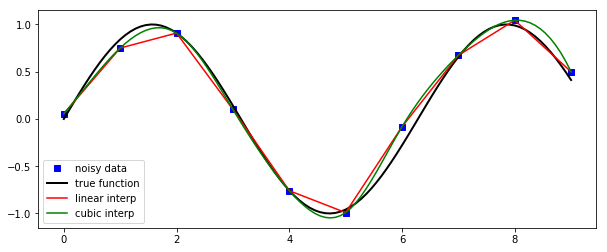

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='noisy data')
ax.plot(x, y_real, 'k', lw=2, label='true function')
ax.plot(x, y_interp1, 'r', label='linear interp')
ax.plot(x, y_interp2, 'g', label='cubic interp')
ax.legend(loc=3);

## Statistics

The `scipy.stats` module contains a large number of statistical distributions, statistical functions and tests. For a complete documentation of its features, see http://docs.scipy.org/doc/scipy/reference/stats.html.

There is also a very powerful python package for statistical modelling called statsmodels. See http://statsmodels.sourceforge.net for more details.

In [ ]:
from scipy import stats

In [ ]:
# create a (discreet) random variable with poissionian distribution

X = stats.poisson(3.5) # photon distribution for a coherent state with n=3.5 photons

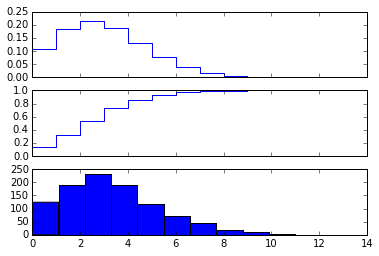

In [ ]:
n = arange(0,15)

fig, axes = plt.subplots(3,1, sharex=True)

# функцию плотности вероятности PDF (Probability Density Function) 
axes[0].step(n, X.pmf(n))

# plot the commulative distribution function (CDF)
axes[1].step(n, X.cdf(n))

# Гистограмма 
axes[2].hist(X.rvs(size=1000));

In [ ]:
# create a (continous) random variable with normal distribution
Y = stats.norm()

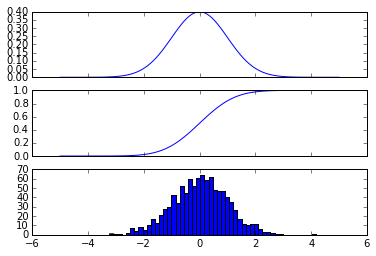

In [ ]:
x = linspace(-5,5,100)

fig, axes = plt.subplots(3,1, sharex=True)

# plot the probability distribution function (PDF)
axes[0].plot(x, Y.pdf(x))

# plot the commulative distributin function (CDF)
axes[1].plot(x, Y.cdf(x));

# plot histogram of 1000 random realizations of the stochastic variable Y
axes[2].hist(Y.rvs(size=1000), bins=50);

Statistics:

In [ ]:
X.mean(), X.std(), X.var() # poission distribution

(3.5, 1.8708286933869707, 3.5)

In [ ]:
Y.mean(), Y.std(), Y.var() # normal distribution

(0.0, 1.0, 1.0)

### Statistical tests

Test if two sets of (independent) random data comes from the same distribution:

In [ ]:
t_statistic, p_value = stats.ttest_ind(X.rvs(size=1000), X.rvs(size=1000))

print "t-statistic =", t_statistic
print "p-value =", p_value

t-statistic = -0.901953297251
p-value = 0.367190391714


Since the p value is very large we cannot reject the hypothesis that the two sets of random data have *different* means.

To test if the mean of a single sample of data has mean 0.1 (the true mean is 0.0):

In [ ]:
stats.ttest_1samp(Y.rvs(size=1000), 0.1)

Ttest_1sampResult(statistic=-3.1644288210071765, pvalue=0.0016008455559249511)

Low p-value means that we can reject the hypothesis that the mean of Y is 0.1.

In [ ]:
Y.mean()

0.0

In [ ]:
stats.ttest_1samp(Y.rvs(size=1000), Y.mean())

Ttest_1sampResult(statistic=2.2098772438652992, pvalue=0.027339807364469011)

## Further reading

* http://www.scipy.org - The official web page for the SciPy project.
* http://docs.scipy.org/doc/scipy/reference/tutorial/index.html - A tutorial on how to get started using SciPy. 
* https://github.com/scipy/scipy/ - The SciPy source code. 

## Versions

In [ ]:
%reload_ext version_information

%version_information numpy, matplotlib, scipy

Software versions
Python 2.7.10 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 3.2.1
OS Darwin 14.1.0 x86_64 i386 64bit
numpy 1.9.2
matplotlib 1.4.3
scipy 0.16.0
Sat Aug 15 11:13:18 2015 JST